In [10]:
%matplotlib notebook
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from itertools import cycle

In [3]:
def draw_correlation_matrix(df):
    sns.set(style="white")
    # Compute the correlation matrix
    corr = df.corr()
    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, square=True, 
                linewidths=.5, cbar_kws={"shrink": .5})

In [4]:
df = pd.read_csv('./data/dow_jones_index.data')

In [5]:
df.head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.79267,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.63831,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.93325,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029


In [6]:
def take_out_sign(df, array_columns_name):
    for column_name in array_columns_name:
        df[column_name] = [float(re.sub('\$', '', i)) for i in df[column_name]]

take_out_sign(df, ['open','high','low','close','next_weeks_open','next_weeks_close'])

In [7]:
df.head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,15.82,16.72,15.78,16.42,239655616,3.79267,NaN,NaN,16.71,15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,16.71,16.71,15.64,15.97,242963398,-4.42849,1.380223,239655616.0,16.19,15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,16.19,16.38,15.60,15.79,138428495,-2.47066,-43.024959,242963398.0,15.87,16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,15.87,16.63,15.82,16.13,151379173,1.63831,9.355500,138428495.0,16.18,17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,16.18,17.39,16.18,17.14,154387761,5.93325,1.987452,151379173.0,17.33,17.37,0.230814,97,0.175029


<IPython.core.display.Javascript object>


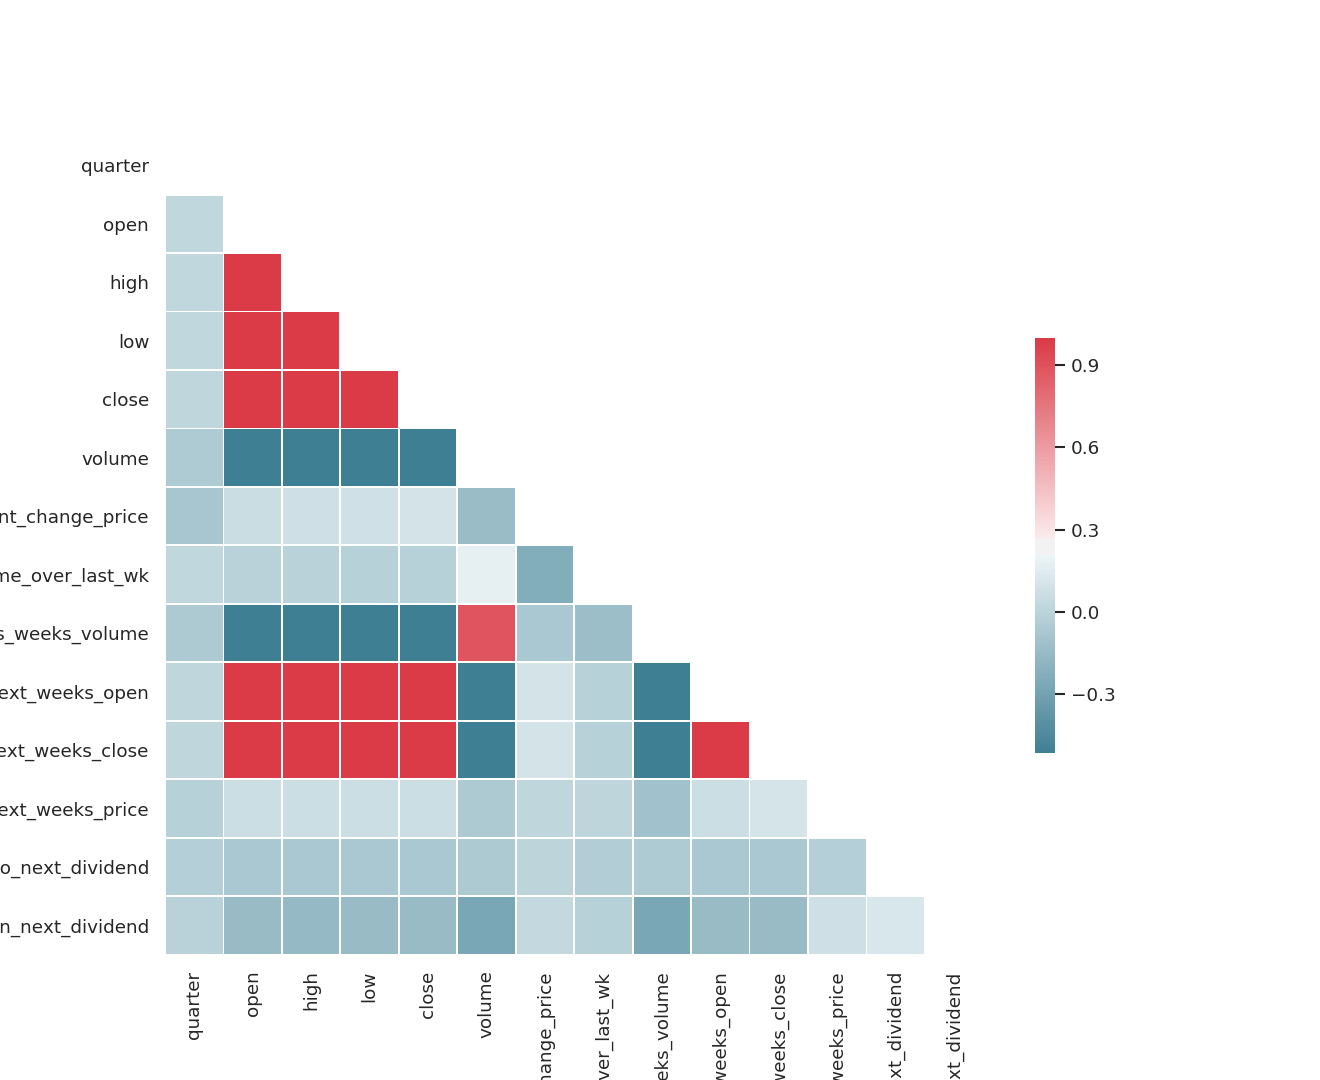

In [13]:
draw_correlation_matrix(df)

<IPython.core.display.Javascript object>


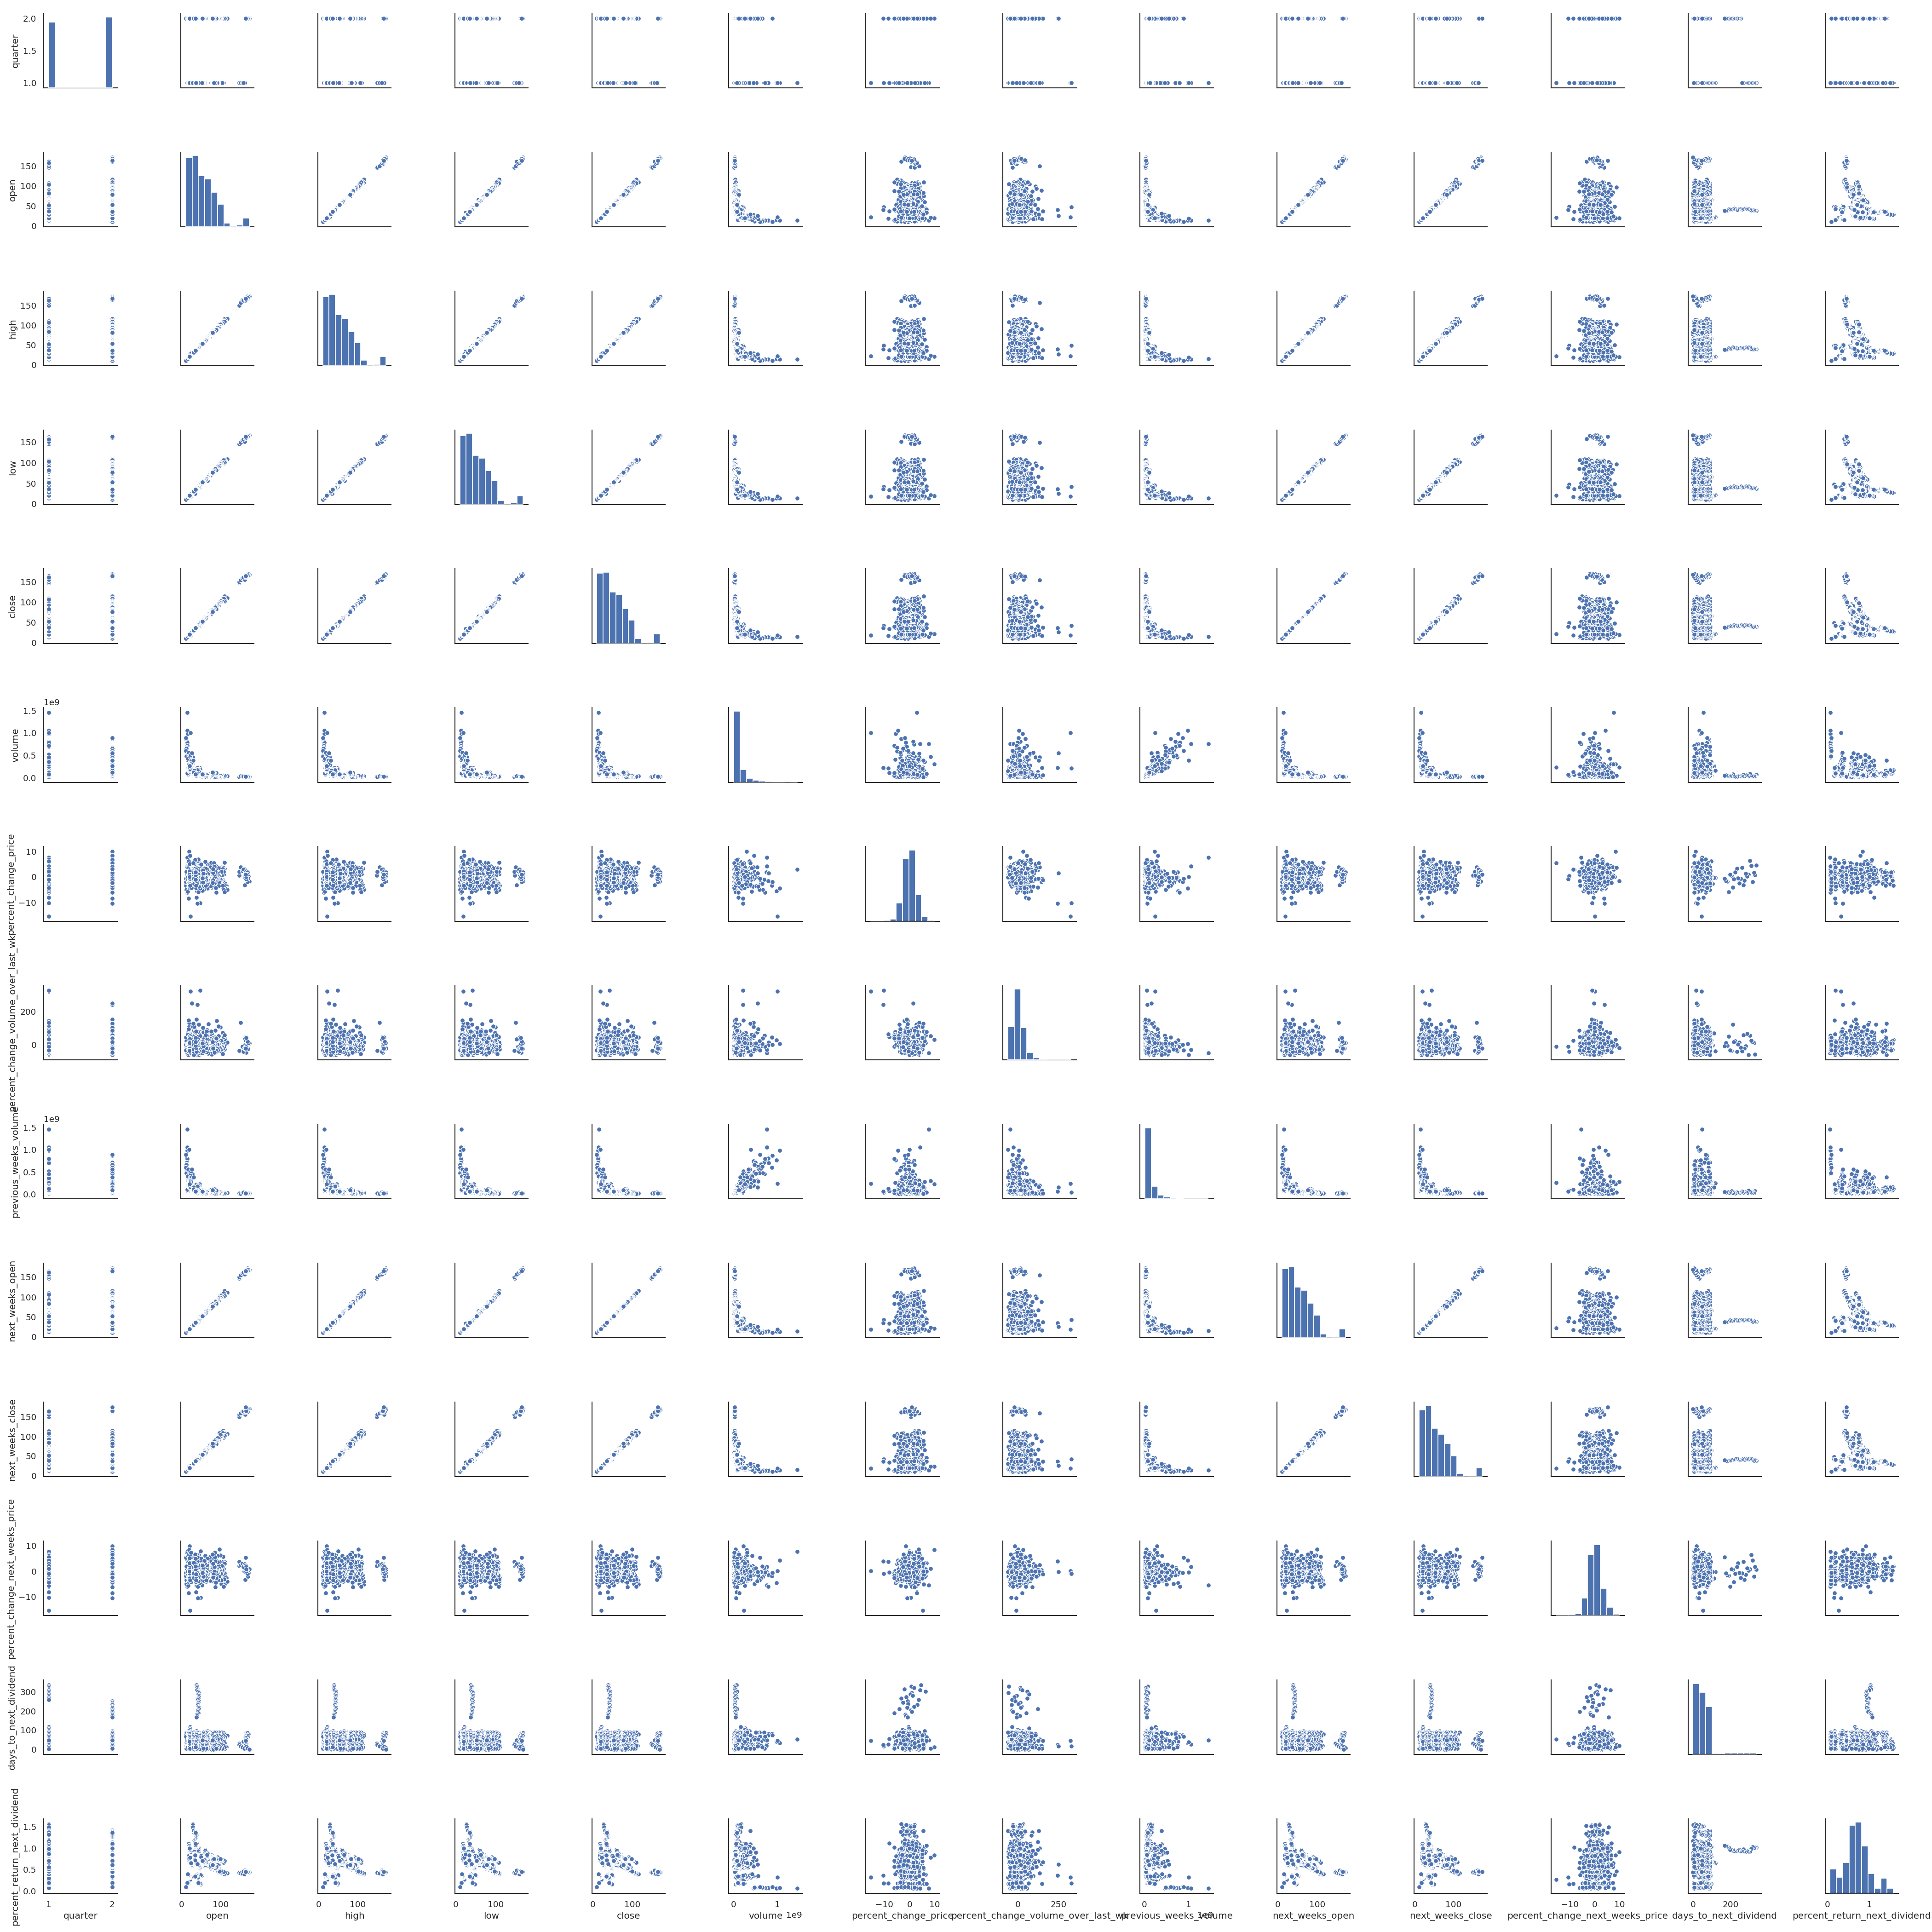

/home/valeporti/.local/lib/python3.6/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/valeporti/.local/lib/python3.6/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


In [65]:
sns.pairplot(df)

In [15]:
from sklearn.cluster import MeanShift

16.38

In [43]:
#m = [df.high, df.percent_change_price]
m = [0] * len(df.high)
for i in range(len(df.high)):
    m[i] = [df.high[i], df.percent_change_price[i]]
m

[[16.72, 3.7926699999999998],
 [16.71, -4.42849],
 [16.38, -2.4706599999999996],
 [16.63, 1.63831],
 [17.39, 5.93325],
 [17.48, 0.230814],
 [17.68, -0.632547],
 [17.15, -1.76678],
 [16.94, -1.3682299999999998],
 [16.75, -3.31725],
 [16.33, 1.0031299999999999],
 [17.24, 4.33455],
 [45.6, 2.44804],
 [46.25, 4.6380099999999995],
 [46.71, -0.06517490000000001],
 [46.27, -4.7557],
 [44.23, -0.7024699999999999],
 [46.79, 6.34668],
 [46.93, -1.9172799999999999],
 [45.12, -3.13752],
 [44.68, -0.0228676],
 [45.54, 0.957592],
 [44.47, 0.7067939999999999],
 [45.61, 1.8770900000000001],
 [70.1, 4.88284],
 [70.5, 0.9363299999999999],
 [72.99, 1.15721],
 [72.82, -3.2019],
 [71.64, 3.06093],
 [72.99, 0.99398],
 [73.04, 0.467675],
 [74.29, -0.0691085],
 [72.9, -0.9245200000000001],
 [72.5, 0.055865899999999996],
 [71.23, -2.90853],
 [73.5, 4.339169999999999],
 [14.69, 2.88809],
 [15.25, 7.621739999999999],
 [15.16, -5.50398],
 [14.26, -4.5614],
 [14.47, 4.2304900000000005],
 [14.87, 1.79187],
 [14.95,

In [62]:
ms = MeanShift(bandwidth=6).fit(m)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

In [63]:
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)


number of estimated clusters : 14


<IPython.core.display.Javascript object>


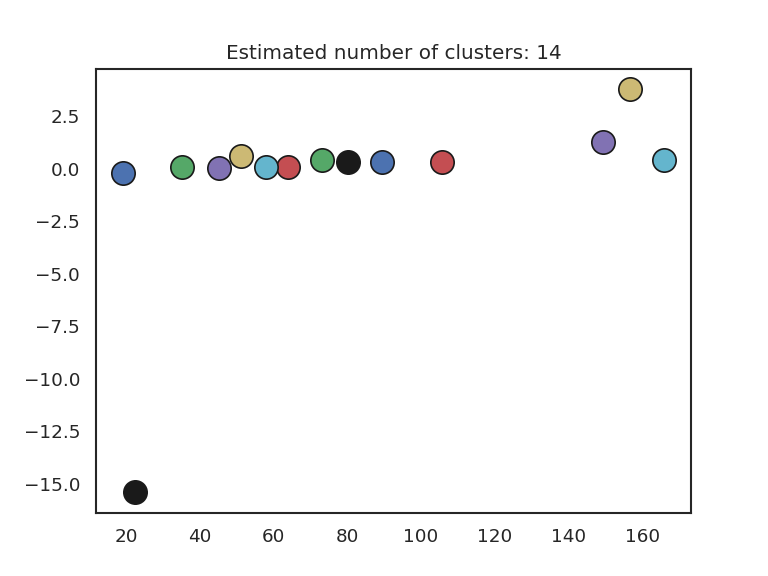

In [64]:
plt.figure()
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
cnt = 0
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    #plt.plot(m[cnt][1], m[cnt][0], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
    cnt += 1
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()